# Análisis de la serie temporal del recuento de paso de ciclistas por una estación de medida ubicada en la ciudad de Helsinki

## 1. Introducción

El objetivo de este proyecto es hacer una introducción al análisis de series temporales a partir del estudio de los datos obtenidos por una de las estaciones de medida de paso de ciclistas instaladas en la ciudad de Helsinki. Se dispone de las observaciones de esta estación medidora con intervalos de una hora en el periodo entre el 1 de enero de 2014 a las 00:00 hasta el 31 de diciembre de 2022 a las 23:00.  

Este análisis se inicia con la visualización de la evolución temporal del conteo de ciclistas y, a continuación, se hace la descomposición de la serie temporal en sus componentes de periodicidad, tendencia e irregularidad. El objetivo del proyecto es verificar a partir de representaciones gráficas cuáles son los meses del año en que hay mayor paso de ciclistas en dicha estación, así como analizar las componentes de la serie temporal por separado.

Dado que se quiere analizar la información por meses y se dispone de los datos en intervalos de medida de una hora, antes del análisis de la serie temporal se debe hacer un paso previo para obtener una medida a escala mensual, en este caso el número medio de ciclistas contados por día en cada mes del periodo.  

La estación de conteo elegida es la ubicada en la infraestructura denominada *Baana*, una antigua vía ferroviaria que atraviesa el centro de la ciudad y que se ha acondicionado como corredor exclusivo para peatones y ciclistas completamente segregada del tráfico de vehículos a motor.

### 1.1 Breve introducción a las series temporales

A grandes rasgos se puede definir una serie temporal de datos como una secuencia de observaciones capturadas a intervalos regulares de tiempo; por ejemplo cada segundo, cada minuto, cada mes, cada cinco años, etc. Conviene mencionar que es posible encontrar series temporales a intervalos irregulares de tiempo, aunque en este caso su análisis es más complejo.

Para analizar correctamente una serie temporal es necesario observar por separado las cuatro componentes que la forman:

* **Tendencia.** Evolución en el largo plazo de la serie temporal.
* **Estacionalidad.** Comportamiento repetido de manera periódica en cada ciclo.
* **Ciclicidad.** Variaciones observadas en periodos mayores que un ciclo, debidas a altibajos que se van repitiendo de vez en cuando.
* **Irregularidades.** Variaciones impredecibles y erráticas, aleatorias o no, tales como ruido o errores.

Finalmente hay que tener en cuenta los dos tipos de series temporales que se pueden encontrar según se combinen sus componentes:

* **Serie temporal aditiva,** obtenida a partir de la suma de sus componentes de tendencia, estacionalidad e irregularidades.
* **Serie temporal multiplicativa,** obtenida a partir del producto de sus componentes de tendencia, estacionalidad e irregularidades.

### 1.2 Contexto del proyecto  

Mi Trabajo Final de Master de la UOC consistió en un análisis del uso de las infraestructuras viarias para ciclistas en la ciudad de Helsinki. Uno de los parámetros que se tuvieron en cuenta en este análisis fueron las observaciones de las distintas estaciones de conteo de ciclistas ubicadas en la capital finlandesa. He decidido aprovechar el trabajo de preproceso de los datos originales que hice para el TFM y usar el dataset resultante en este proyecto.

La elección de la estación de conteo a analizar se basa en los resultados obtenidos en el TFM, ya que se comprobó que la estación de *Baana* es la de mayor flujo de ciclistas por hora en las mañanas de los días laborables.

### 1.3 Fuente de los datos

El dataset que se ha utilizado en este proyecto pertenece al Departamento de Desarrollo Urbano del Ayuntamiento de Helsinki y se ha descargado a través del portal de datos abiertos Avoin Data que lo publica bajo licencia CC-BY 4.0

El dataset actualizado se puede encontrar en el siguiente enlace: [Number of Cyclists in Helsinki](https://www.avoindata.fi/data/en_GB/dataset/helsingin-pyorailijamaarat)

Licencia: [Helsingin pyöräilijämäärät](https://www.avoindata.fi/data/en_GB/dataset/helsingin-pyorailijamaarat) by [Helsingin kaupunkiympäristön toimiala](https://www.avoindata.fi/data/en_GB/organization/helsingin-kaupunkiympariston-toimiala) is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/). 


## 2. Carga de los datos y EDA

### 2.1 Lectura del fichero CSV  
Se hace la importación del fichero CSV preprocesado con el contaje horario de ciclistas en cada una de las estaciones de medida instaladas en la ciudad de Helsinki. Una vez cargada la información en un dataframe se mantendrán únicamente los datos correspondientes a los recuentos de la estación *Baana*, codificada en el proceso previo de adecuación como *HCB20*.

In [1]:
# Carga de las librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Lectura del fichero con los datos y visualizacion de las primeras lineas

cyclists_df = pd.read_csv("data/number_of_cyclists.csv")

print(cyclists_df.head())

        Datetime  HCB01  HCB02  HCB03  HCB04  HCB05  HCB06  HCB07  HCB08  \
0  1/1/2014 0:00    NaN    7.0    NaN    1.0    NaN    NaN    NaN    NaN   
1  1/1/2014 1:00    NaN    5.0    NaN    3.0    NaN    NaN    NaN    NaN   
2  1/1/2014 2:00    NaN    2.0    NaN    3.0    NaN    NaN    NaN    NaN   
3  1/1/2014 3:00    NaN    5.0    NaN    2.0    NaN    NaN    NaN    NaN   
4  1/1/2014 4:00    NaN    1.0    NaN    4.0    NaN    NaN    NaN    NaN   

   HCB09  ...  HCB11  HCB12  HCB13  HCB14  HCB15  HCB16  HCB17  HCB18  HCB19  \
0    NaN  ...    NaN    2.0    5.0    3.0    NaN   11.0    NaN    NaN    NaN   
1    NaN  ...    NaN    6.0    5.0    1.0    NaN    8.0    NaN    NaN    NaN   
2    NaN  ...    NaN    1.0    1.0    1.0    NaN   14.0    NaN    NaN    NaN   
3    NaN  ...    NaN    0.0    2.0    0.0    NaN    7.0    NaN    NaN    NaN   
4    NaN  ...    NaN    1.0    1.0    1.0    NaN    9.0    NaN    NaN    NaN   

   HCB20  
0    8.0  
1    4.0  
2   11.0  
3    3.0  
4    4.

In [3]:
# De los datos de contaje, me quedo unicamente con la columna de la estacion Baana (HCB20)

cyclists_df = cyclists_df[["Datetime","HCB20"]]

cyclists_df = cyclists_df.rename(columns={"HCB20": "Total"})

print(cyclists_df.head())

        Datetime  Total
0  1/1/2014 0:00    8.0
1  1/1/2014 1:00    4.0
2  1/1/2014 2:00   11.0
3  1/1/2014 3:00    3.0
4  1/1/2014 4:00    4.0


### 2.2 Validación de los datos  
Se verifica la presencia de valores nulos (NaN) y se establece un criterio para hacer las correcciones necesarias. En este caso en concreto, se decide asignar el valor 0 a cada uno de los valores encontrados, ya que se ha comprobado que corresponden a dos registros en horario de madrugada y se ha considerado que es razonable pensar que el número de ciclistas contados en ese periodo sea especialmente bajo. También se ha tenido en cuenta que en el análisis de la serie temporal se va a tomar el número medio diario de ciclistas contados por mes, por lo que se considera que esta asignación arbitraria no debería afectar a esta medida.

In [4]:
# Busqueda de valores nulos (NaN) en la columna de recuento de ciclistas por hora
print(cyclists_df[cyclists_df['Total'].isnull()])
print(cyclists_df.isnull().sum())

             Datetime  Total
63435  28/3/2021 3:00    NaN
72172  27/3/2022 4:00    NaN
Datetime    0
Total       2
dtype: int64


In [5]:
# Sustitucion de los valores nulos por el valor 0 y verificacion de la operacion
cyclists_df = cyclists_df.fillna(0)
print(cyclists_df.isnull().sum())

Datetime    0
Total       0
dtype: int64


### 2.3 Análisis exploratorio  
Una vez se ha comprobado que el dataset no contiene valores nulos, se verifican los parámetros estadísticos.  

El número medio ciclistas contados en una hora en la estación de Baana es de 101.15, situándose el segundo cuartil en 47 y el tercero en 151. Se observa un valor máximo de 1607 ciclistas, diez veces mayor que el valor del tercer cuartil, lo que sugiere que se trata de un valor atípico.

In [6]:
# Compruebo los parámetros estadísticos
print(cyclists_df.describe(include="all"))

             Datetime         Total
count           78888  78888.000000
unique          78888           NaN
top     1/1/2014 0:00           NaN
freq                1           NaN
mean              NaN    101.150381
std               NaN    127.430434
min               NaN      0.000000
25%               NaN     11.000000
50%               NaN     47.000000
75%               NaN    151.000000
max               NaN   1607.000000


A continuación se representa la distribución y el diagrama *boxplot* de los recuentos de ciclistas por horas. Como se puede ver en las gráficas obtenidas, la distribución es asimétrica, con gran número de observaciones en el rango de 0 a 100 ciclistas. El *boxplot* revela que el valor máximo hallado es un valor atípico, que podría deberse o bien a un error en la lectura de los datos o bien por algún evento puntual, por ejemplo una marcha cicloturista popular, que haya causado esta lectura tan alta.  

Respecto al valor atípico hallado se decide eliminar esta observación del dataframe, teniendo en cuenta que los datos que se van a usar en el análisis de la serie temporal es la media diaria de ciclistas contados por mes. Así se pretende evitar que este *outlier* afecte a la medida que se usará.  

Tanto la distribución como el diagrama *boxplot* revelan que hay una serie de observaciones por encima del límite superior. Se decide mantener estas observaciones en el dataframe ya que dadas las condiciones climáticas de la ciudad de Helsinki se considera razonable pensar que las horas de máxima afluencia de ciclistas son minoritarias y concentradas en los meses menos fríos del año. Se sugiere analizar cuándo se dan estos máximos de contaje de ciclistas, un estudio que queda fuera del alcance de este proyecto.

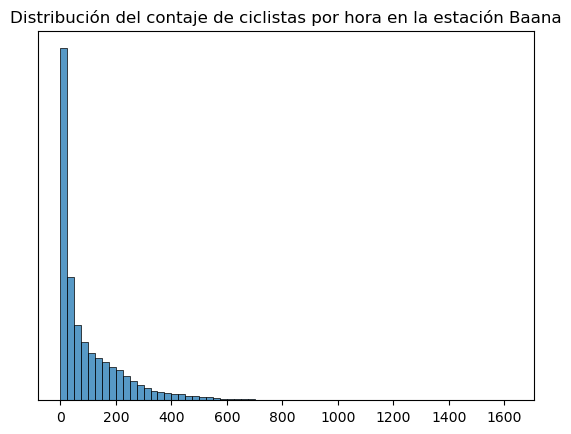

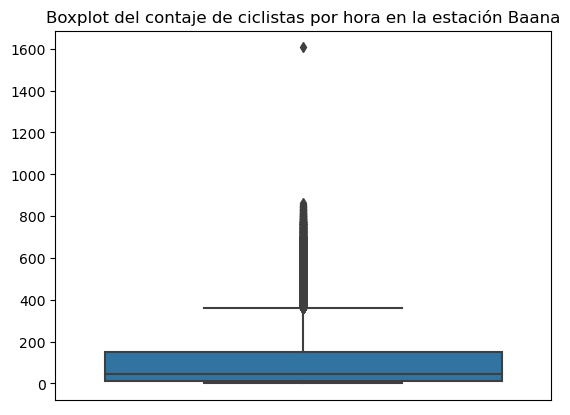

In [7]:
# Representacion del histograma
g = sns.histplot(data=cyclists_df, x='Total', binwidth=25)

plt.title('Distribución del contaje de ciclistas por hora en la estación Baana')
plt.xlabel(None)
plt.ylabel(None)
g.set_yticks([])

plt.show()

# Representacion del boxplot
g = sns.boxplot(data=cyclists_df, y='Total')

plt.title('Boxplot del contaje de ciclistas por hora en la estación Baana')
plt.ylabel(None)
g.set_xticks([])

plt.show()

In [8]:
# Eliminacion de outliers del dataframe (el unico valor > 1000)
cyclists_df = cyclists_df[cyclists_df['Total'] <= 1000]

# Verificacion de los valores estadisticos
print(cyclists_df.describe(include="all"))

             Datetime         Total
count           78887  78887.000000
unique          78887           NaN
top     1/1/2014 0:00           NaN
freq                1           NaN
mean              NaN    101.131293
std               NaN    127.318404
min               NaN      0.000000
25%               NaN     11.000000
50%               NaN     47.000000
75%               NaN    151.000000
max               NaN    863.000000


## 3. Visualización de la evolución temporal del recuento de ciclistas
Para el análisis de la serie temporal se va a tener en cuenta la evolución mes a mes de la media diaria de ciclistas contados. La serie temporal contendrá los datos registrados en el periodo comprendido entre enero de 2014 y diciembre de 2022.  

### 3.1 Preparación de los datos
Para poder realizar el análisis de la serie temporal se deben preparar los datos para que contengan la información necesaria. Los pasos que se siguen en este proceso son los siguientes:  

* Conversión de la columna datetime a tipo *Datetime* para la gestion de las fechas  
* Suma de los totales de ciclistas contados por día
* Cálculo de la media del contaje diario de ciclistas por mes-año

In [9]:
# Conversion de la columna datetime a tipo Datetime para la gestion de las fechas
cyclists_df["Datetime"] = pd.to_datetime(cyclists_df["Datetime"], format="%d/%m/%Y %H:%M")

In [10]:
# Agregacion de los totales por dia en el dataframe cyclists_daily_df
cyclists_df["Date"] = cyclists_df["Datetime"].dt.to_period("D")
cyclists_daily_df = cyclists_df.groupby("Date")["Total"].sum().reset_index()

print(cyclists_daily_df.head())

         Date  Total
0  2014-01-01  289.0
1  2014-01-02  921.0
2  2014-01-03  912.0
3  2014-01-04  422.0
4  2014-01-05  497.0


In [11]:
# Agregacion de las medias mensuales a partir de los totales diarios
cyclists_daily_df["Date"] = pd.to_datetime(cyclists_daily_df["Date"].astype(str), format="%Y-%m-%d")
cyclists_daily_df["YearMonth"] = cyclists_daily_df["Date"].dt.to_period("M")

# Calculo de la media diaria por mes
cyclists_monthly_df = cyclists_daily_df.groupby("YearMonth")["Total"].mean().reset_index()

# Cambio de nombre del atributo para mayor claridad
cyclists_monthly_df = cyclists_monthly_df.rename(columns={"Total": "DailyAvg"})

# Conversion de la columna YearMonth a tipo Datetime para la gestion de las fechas
cyclists_monthly_df["YearMonth"] = pd.to_datetime(cyclists_monthly_df["YearMonth"].astype(str), format="%Y-%m")

# Visualizacion de los 5 primeros registros
print(cyclists_monthly_df.head())

   YearMonth     DailyAvg
0 2014-01-01   537.354839
1 2014-02-01   542.107143
2 2014-03-01  1114.516129
3 2014-04-01  2107.333333
4 2014-05-01  2806.419355


### 3.2 Representación gráfica de la serie temporal de recuento de ciclistas
A continuación se muestra la representación gráfica de la evolución temporal de la media diaria de ciclistas por mes en el periodo entre enero de 2014 y diciembre de 2022.  

En la gráfica se observa una tendencia ascendente en el periodo entre los años 2014 y 2018, y una tendencia de estabilidad a partir del año 2019, con un ligero descenso en el año 2020 debido muy probablemente a la situación de emergencia sanitaria mudial a causa de la pandemia de COVID-19.  

Se comprueba que hay una diferencia de uso de la bicicleta muy acusada entre los meses de invierno y los de verano, así como la presencia de dos picos máximos en los meses de verano en todos los años excepto 2014 y 2021. Estos dos picos sugieren que la actividad en la ciudad de Helsinki disminuye notablemente debido, posiblemente, al periodo de vacaciones de verano.

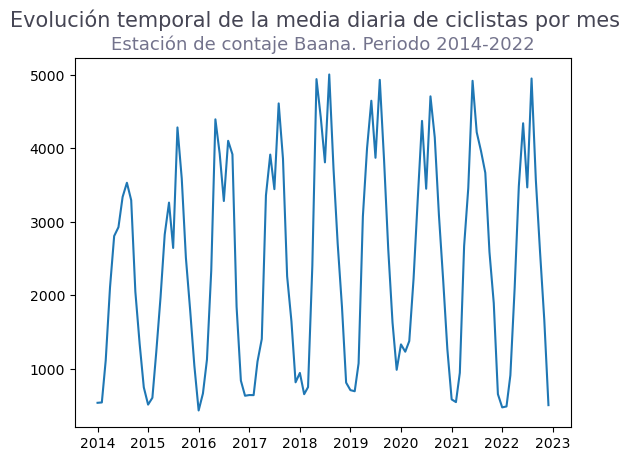

In [12]:
# Representación gráfica de la serie temporal
g = sns.lineplot(x="YearMonth", y="DailyAvg", data=cyclists_monthly_df)

plt.suptitle(
    "Evolución temporal de la media diaria de ciclistas por mes",
    fontsize=15,
    color="#454554"
)

plt.title(
    "Estación de contaje Baana. Periodo 2014-2022",
    fontsize=13,
    color="#73738c"
)

plt.xlabel(None)
plt.ylabel(None)

plt.show()


### 3.3 Visualización de la serie temporal mediante un gráfico *heatmap*
Con el fin de disponer de una representación alternativa más clara a simple vista de la serie temporal, se crea una visualización de tipo *heatmap*. Se trata de una representación bidimensional, por lo que es necesario crear una matriz que será la que usará *seaborn* para pintar el gráfico. El índice de la matriz será el año, mientras que las columnas serán los meses.  

Pasos a realizar:  
* Separar en dos campos distintos el mes y el año. Los meses del año se obtendrán mediante el parámetro *'%b'* para obtener la abreviatura de tres caracteres, en inglés.  
* "Pivotar" la tabla de manera que a cada mes le corresponda una columna. La cabecera de cada columna será el nombre del mes ("Jan", "Feb", "Mar", ...). Como resultado del proceso de "pivoting", se generan automáticamente los índices necesarios.  
* Reordenar los nombres de los meses según su orden cronológico, ya que el proceso de "pivoting" los ordena alfabéticamente.

In [13]:
# Creación de un nuevo dataframe, copia del anterior, para poder generar la matriz para representar el heatmap
# sin afectar al dataframe original que se utilizará para generar la serie temporal
cyc_mth_heatmap = cyclists_monthly_df.copy()

# PASO 1. Extraccion del año y del mes de la fecha (campo YearMonth) - Parámetro '%b' para abreviatura del mes
cyc_mth_heatmap['Year'] = cyc_mth_heatmap['YearMonth'].dt.strftime('%Y')
cyc_mth_heatmap['Month'] = cyc_mth_heatmap['YearMonth'].dt.strftime('%b')

In [14]:
# PASO 2. Pivotar la tabla de manera que las columnas sean los meses
cyc_mth_heatmap = cyc_mth_heatmap.pivot(index="Year", columns="Month", values="DailyAvg")

In [15]:
# PASO 3. Reordenar las columnas de los meses, que ahora estan en orden alfabetico
cyc_mth_heatmap = cyc_mth_heatmap.loc[:,["Jan","Feb","Mar","Apr",
                                         "May","Jun","Jul","Aug",
                                         "Sep","Oct","Nov","Dec"]]

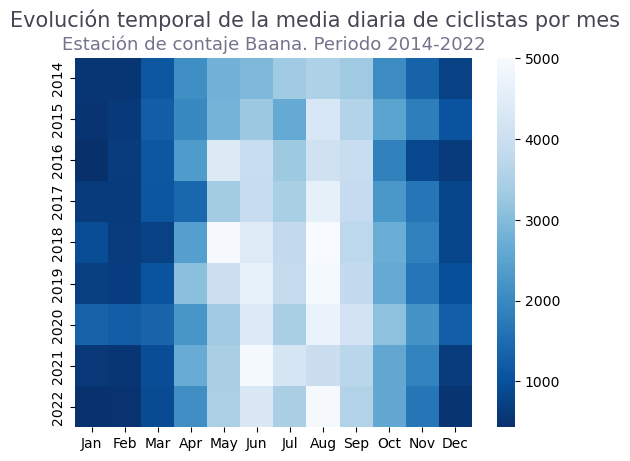

In [16]:
# Pintar el heatmap
sns.heatmap(data = cyc_mth_heatmap, cmap="Blues_r")

plt.suptitle(
    "Evolución temporal de la media diaria de ciclistas por mes",
    fontsize=15,
    color="#454554"
)

plt.title(
    "Estación de contaje Baana. Periodo 2014-2022",
    fontsize=13,
    color="#73738c"
)

plt.xlabel(None)
plt.ylabel(None)

plt.show()

La representación de la evolución temporal mediante el *heatmap* permite ver fácilmente, a simple vista, que los meses en que se cuentan más ciclistas por día son los meses entre mayo y septiembre, así como que en el mes de julio el número de ciclistas contados al día es inferior a los contados en junio y agosto.

## 4. Descomposición de la serie temporal

En este punto se descompone la serie temporal del conteo de ciclistas para obtener sus componentes de tendencia, estacionalidad e irregularidades (*resid* en la gráfica) descritas en el *apartado 1.1*, para lo que se va a usar la  función *seasonal_decompose()* de la librería *statsmodel*. Dado que intervalo de las observaciones es mensual y los ciclos son de un año, el parámetro *period* de la función ha de ser igual a 12. Asimismo, se considera que se trata de una serie temporal de tipo aditivo.

Se va a usar el dataframe *cyclists_monthly_df* que contiene la media mensual de ciclistas contados al día. La función *seasonal_decompose()* requiere que se le pasen las observaciones en un objeto de tipo *Series*, en el que se incluirán las fechas como índices de la serie.

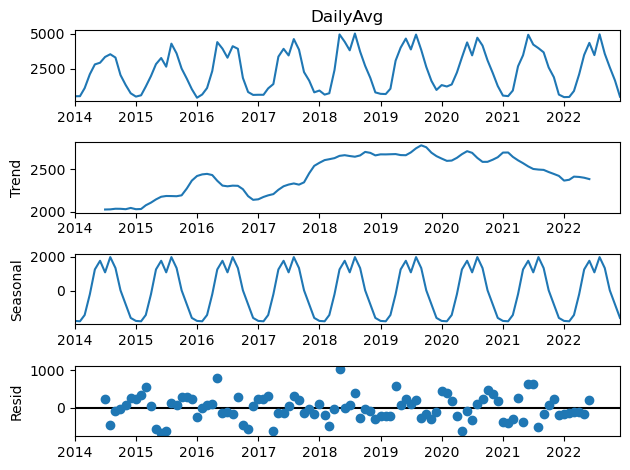

In [17]:
#cycle_ts = pd.Series(cyclists_monthly_df["DailyAvg"], index=cyclists_monthly_df["YearMonth"])
cycle_ts = pd.Series(cyclists_monthly_df["DailyAvg"])
cycle_ts.index = cyclists_monthly_df["YearMonth"]

cycle_decomp = seasonal_decompose(cycle_ts, model="additive", period=12)

fig = cycle_decomp.plot()
plt.show()

La descomposición de la serie temporal del número medio diario de ciclistas en la estación *Baana* muestra que la línia de tendencia va a la baja en los últimos dos años, convendría analizar el tráfico de ciclistas en el resto de la ciudad para verificar si se trata de un hecho puntual de esta estación o si se observa un descenso generalizado en el uso de la bicicleta en la capital finlandesa. La componente estacional muestra la gran diferencia en el paso de ciclistas en los meses de verano respecto a los de invierno, así como también pone de manifiesto el descenso en el contaje en el mes de julio.

## 5. Conclusión
En este proyecto se ha hecho una introducción al análisis de series temporales mediante la observación de la evolución del recuento de paso de ciclistas por una estación de medida ubicada en la ciudad de Helsinki. El dataset facilitado contiene las observaciones en intervalos de una hora, desde el día 1 de enero de 2014 a las 0:00 hasta el 31 de diciembre de 2022 a las 23:00. Con el objetivo de disponer de una escala de tiempo adecuada y simplificar el análisis de la serie temporal, se va a considerar el número medio de ciclistas contados al día cada mes.  

La representación gráfica de los datos agregados mensualmente permiten observar algunos patrones en el uso de la bicicleta, como las diferencias entre verano e invierno o el descenso en el recuento los meses de julio. La descomposición de la serie temporal ha permitido visualizar las componentes de la serie mensual.  

**Siguientes pasos**  
Más allá de este análisis introductorio a las series temporales, los siguientes pasos serán la obtención de los modelos y la predicción de tendencias futuras a partir de los modelos obtenidos. A la hora de modelar la serie temporal se considerarán principalmente los modelos autoregresivos, ARIMA y Holt-Winters.